## Time Series Characteristics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import statsmodels.api as sm

In [2]:
train = pd.read_pickle('data/train.pkl')
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18288 entries, 2012-08-25 00:00:00 to 2014-09-25 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   18288 non-null  int64
 1   year    18288 non-null  int64
 2   month   18288 non-null  int64
 3   day     18288 non-null  int64
 4   Hour    18288 non-null  int64
dtypes: int64(5)
memory usage: 857.2 KB


#### Time Series Components 

* Level: The average value in the series.
* Trend: The increasing or decreasing value in the series.
* Seasonality: The repeating short-term cycle in the series.
* Noise: The random variation in the series.
* Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
* Non-Systematic: Components of the time series that cannot be directly modeled

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6
plt.style.use('dark_background')

Additive model: when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add n passengers). 

Multiplicative model: when we increase (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

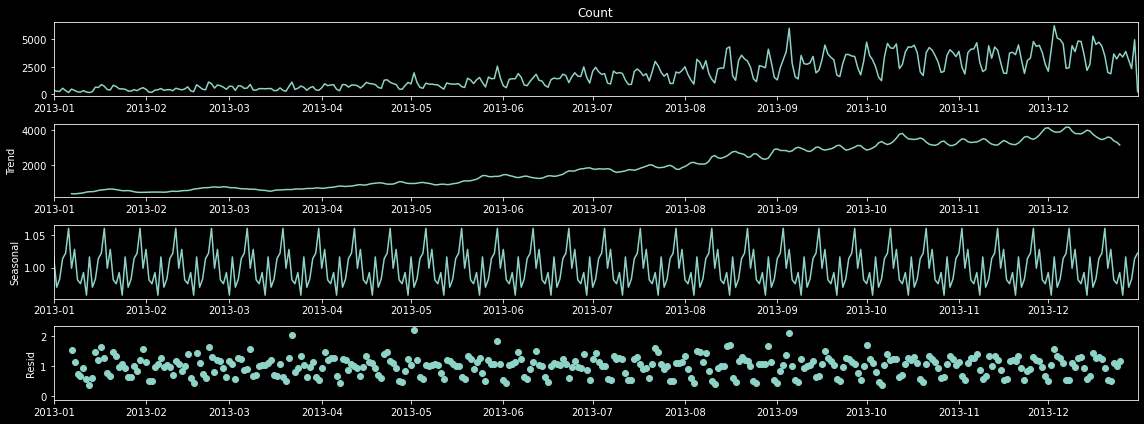

In [5]:
seasonal_decompose(train.loc[datetime(2013, 1, 1):datetime(2013, 12, 31)].Count.resample("D").sum(),
                   model='multiplicative', period = 12).plot()
plt.show()

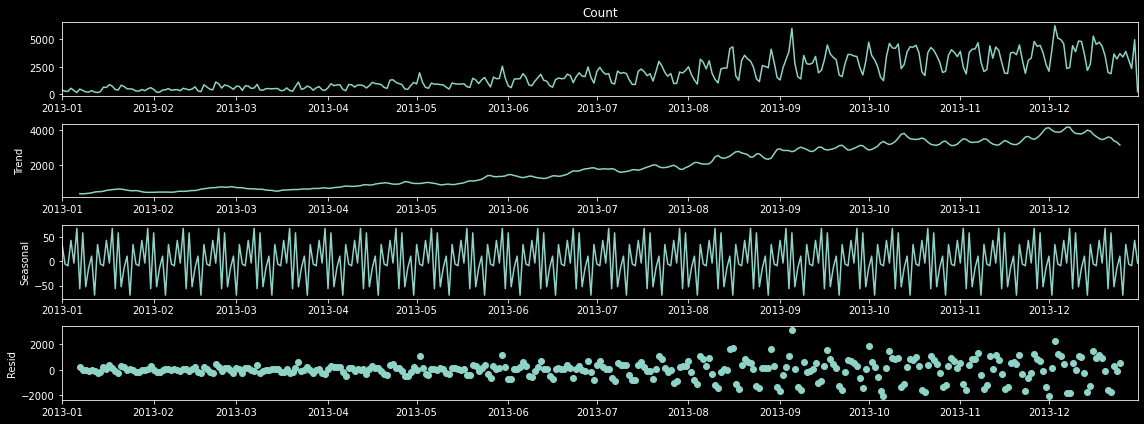

In [6]:
seasonal_decompose(train.loc[datetime(2013, 1, 1):datetime(2013, 12, 31)].Count.resample("D").sum(),
                   model='additive', period = 12).plot()
plt.show()

#### Additive seasonality & Multiplicative seasonality 

* y(t) = Level + Trend + Seasonality + Noise  

An additive model is linear where changes over time are consistently made by the same amount. A linear trend is a straight line. A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles)

* y(t) = Level * Trend * Seasonality * 

Noise A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time. A nonlinear trend is a curved line. A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

![](images/image.png)

### Stationarity

* Constant mean
* Constant variance 
* Auto-covariance does not depend on time

The time series does not have time-dependent structure

#### Augmented Dickey–Fuller (unit root test)

Null Hypothesis (H0): The time series has a unit root (non-stationary)  

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

#### KPSS

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

In [7]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

daily_count = train.Count.resample("D").sum()
def ADF(serie):
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
ADF(daily_count)

ADF Statistic: 2.986351
p-value: 1.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [8]:
ADF(train.Count)

ADF Statistic: -4.456561
p-value: 0.000235
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


**The daily count series is not stationary**

**Make Time Series stationary:** 
* Reduce trend by taking Log or sqrt
* Simple Differencing

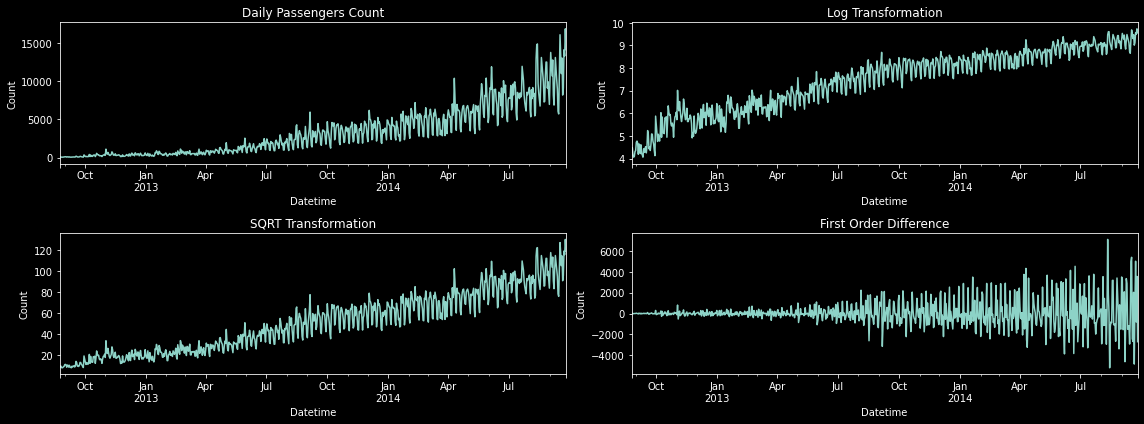

In [9]:
plt.subplot(2,2,1)
daily_count.plot(title = "Daily Passengers Count", ylabel = "Count")
plt.subplot(2,2,2)
np.log(daily_count).plot(title = 'Log Transformation', ylabel = "Count")
plt.subplot(2,2,3)
np.sqrt(daily_count).plot(title = 'SQRT Transformation', ylabel = "Count")
plt.subplot(2,2,4)
daily_count.diff().plot(title = 'First Order Difference', ylabel = "Count")
plt.tight_layout()
plt.show()

In [10]:
ADF(np.log(daily_count))

ADF Statistic: -2.413296
p-value: 0.138019
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [11]:
ADF(np.sqrt(daily_count))

ADF Statistic: 0.933386
p-value: 0.993511
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [12]:
ADF(daily_count.diff().dropna())

ADF Statistic: -7.964456
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [13]:
ADF(np.log(daily_count).diff().dropna())

ADF Statistic: -8.877418
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


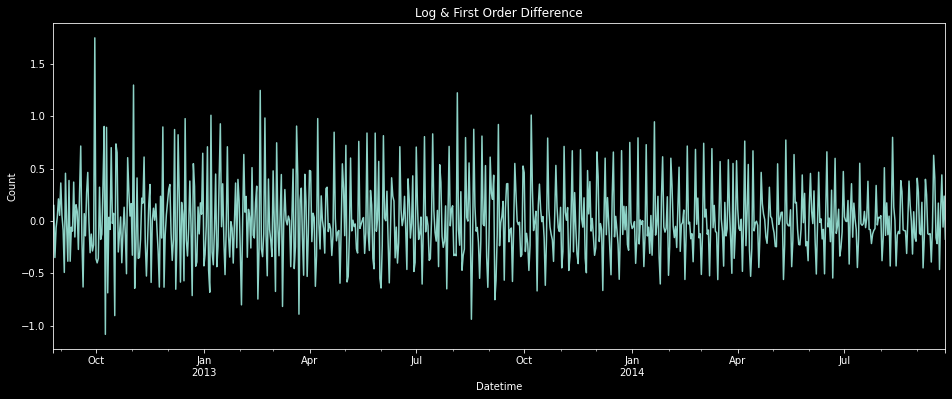

In [14]:
np.log(daily_count).diff().plot(title = 'Log & First Order Difference', ylabel = "Count")
plt.show()